In [1]:
import pathlib

import polars as pl
from hydra import compose, initialize, utils
import seaborn as sns
import plotly.io as pio

In [2]:
sns.set_style("dark")

In [3]:
pio.templates.default = "plotly_dark"

# Сравнение с другими алгоритмами

In [4]:
cross_base_dir = pathlib.Path("exp")

In [5]:
files = []

for dir in cross_base_dir.glob("cross_val_*"):
    files.extend(dir.rglob("cv_res.csv"))

In [6]:
dataframes = []

for file in files:
    dataframes.append(pl.read_csv(file))

files.clear()

In [7]:
cv_res = pl.concat(dataframes)
del dataframes

In [8]:
def show_data(metrics_data: pl.DataFrame, name: str):
    ax = sns.scatterplot(metrics_data.filter(pl.col("name").str.contains(name)), x="fold", y="value", hue="model", style="name")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    ax.grid(True)
    return ax

<Axes: xlabel='fold', ylabel='value'>

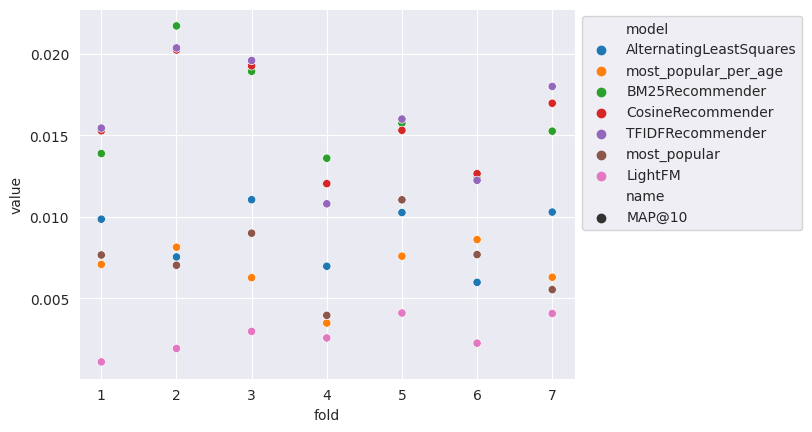

In [9]:
show_data(cv_res, "MAP")